In [1]:
import pandas as pd
from random import randint
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# UNICEF 
### What triggers people to become donors? 
#####                   - An analysis based on the giving frequency and patterns of different typical givers

In [136]:
#creating a couple of functions for later use
def month_from_date(date): 
    return(int(date.split('.')[1])) #extracting month, date format dd.mm.yyyy
    
def str_to_int(amount):
    return(int(amount.split(',')[0])) #converting amount to int

In [15]:
df_original = pd.read_csv('Payment_File_Cash.csv', sep=';')    #Import data
df = pd.DataFrame(columns=['GiverID', 'Month', 'Amount'])    #Initialize data frame to hold features 
df['GiverID'] = df_original['Giver ID']                        #Insert features to the data frame
df['Amount'] = list(map(str_to_int, df_original['Amount'].fillna('0'))) #Insert features to the data frame
df['Month'] = list(map(month_from_date, df_original['Close Date']))  #Insert features to the data frame

df.head() #displaying new dataframe

,GiverID,Month,Amount
0,G-113149,2,90
1,G-243808,12,838
2,G-116363,1,388
3,G-219772,2,250
4,G-122877,3,250


## Group the givers and their typical (averaged) payed per month! 
###### Obs: use the average because the data set is from januar 2017- september 2020. Thus not fully four years and october, november and december would yield less amounts in not the average was used. 

In [16]:
df_mean = df.groupby(by=['GiverID', 'Month']).mean()   #Grouping same user ID's and calculating their average amount
df_mean.head(24)

Amount
GiverID  Month        
G-0219   1       324.0
G-0514   12      368.0
G-0718   3       250.0
         10       90.0
G-100000 12      186.0
G-100001 10      420.0
G-100004 11      554.0
G-100006 1       280.0
G-100007 12      999.0
G-100008 12      450.0
G-100010 2       540.0
G-100015 3       383.0
         4       350.0
         5       387.0
         7       368.0
         9       387.0
         10      443.5
         12      380.0
G-100016 1       717.0
         2       250.0
         6       876.0
         12      736.0
G-100019 2       250.0
G-100020 1       392.0

### Month of max payment, checking that it is the same as max of `df_mean`. 

In [17]:
# Finn maxbeløp per bruker per summerte måned
df_max = df_mean.groupby(by='GiverID').max()
df_max.head(2)

,Amount
GiverID,
G-0219,324.0
G-0514,368.0


### Scale the amounts of each user by their maximum gift. Double check that the month which is `1.000000` under neeth here, has the same value as the month that have max bayment to the user of `df_mean`.

In [18]:
# Normalize the averaged months 
df_scaled = (df_mean / df_max) #normalize 
df_scaled.head(24)  

Amount
GiverID  Month          
G-0219   1      1.000000
G-0514   12     1.000000
G-0718   3      1.000000
         10     0.360000
G-100000 12     1.000000
G-100001 10     1.000000
G-100004 11     1.000000
G-100006 1      1.000000
G-100007 12     1.000000
G-100008 12     1.000000
G-100010 2      1.000000
G-100015 3      0.863585
         4      0.789177
         5      0.872604
         7      0.829763
         9      0.872604
         10     1.000000
         12     0.856821
G-100016 1      0.818493
         2      0.285388
         6      1.000000
         12     0.840183
G-100019 2      1.000000
G-100020 1      1.000000

## Create data frame with one row per giver ID, and the frequency in 12 columns (12 months) for each row. 

In [160]:
df_transformed = pd.DataFrame(index=df['GiverID'].unique(), columns=[m for m in range(1, 13)])  # New dataframe with a index per giver ID with columns from 1 to 12

In [161]:
#df_transformed.iloc[1][2] = 2
#df_transformed.loc['G-243808'][2]
df_transformed

,1,2,3,4,5,6,7,8,9,10,11,12
G-113149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-243808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-116363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-219772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-122877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
G-177971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-8074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-265093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
G-265095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
length = len(df_transformed.index) #used to print later ;) 

for i, idx in enumerate(df_transformed.index): #For each index
    
    if i % 50 == 0: #prints every 50 itteration 
        print(f'Did {i+1}/{length} rows!   ', end='\r')   #just to check the time used, this code takes FOREVER! 
   
    # Put in the transformed vector from df_scaled! Shiiiit! Bæææm!
    for col in range(1, 13):  #goes though all the months of each giver
        try:
                df_transformed.loc[idx][col] = df_scaled.loc[idx].T[col].values[0]  #if the giver gave a gift this month it is added to df_transformed 
        except:  #else
                df_transformed.loc[idx][col] = 0  #zero is added to the month

In [253]:
#df_transformed.to_csv('df_transformed.csv') #save such that the prosses don't have to be done every run
df_transformed = pd.read_csv('df_transformed.csv', index_col='Unnamed: 0')

# And finnaly; clustering!

In [254]:
df_transformed.fillna(0, inplace=True)   #takes away the "NaN's"

In [255]:
df_transformed.head()

,1,2,3,4,5,6,7,8,9,10,11,12
G-113149,0.573529,0.676471,0.558824,0.637255,0.514706,0.897059,0.514706,1.0,0.720588,0.496324,0.588235,0.514706
G-243808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
G-116363,0.847162,0.000000,0.925764,0.000000,0.000000,0.843886,0.803493,0.0,1.000000,0.000000,0.000000,0.897380
G-219772,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
G-122877,0.000000,1.000000,0.431779,0.000000,0.000000,0.982729,0.000000,0.0,0.000000,0.000000,0.000000,0.984456


In [256]:
n_clusters = 2      #number of clusters
mod = KMeans(n_clusters=n_clusters, random_state=0) #creating model
mod.fit(df_transformed)           #training model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Create new data frame with only one row per giver ID and givers cluster ID 

In [257]:
#cluster_df = pd.DataFrame(index=df_transformed.index, columns=['ClusterID'])
    # Grunnen til at vi tar reshape her, er fordi KMeans egentlig forventer å predicte på en matrise, og ikke
    # kun på én rad. Derfor må vi fortelle han at han kun får én rad. Prøv å ta bort reshape, så ser du at den
    # klager!
#cluster_df['ClusterID'] = mod.predict(df_transformed)
df_transformed['ClusterID'] = mod.predict(df_transformed) #predicting the data set 

In [258]:
df_transformed.head()

,1,2,3,4,5,6,7,8,9,10,11,12,ClusterID
G-113149,0.573529,0.676471,0.558824,0.637255,0.514706,0.897059,0.514706,1.0,0.720588,0.496324,0.588235,0.514706,0
G-243808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,1
G-116363,0.847162,0.000000,0.925764,0.000000,0.000000,0.843886,0.803493,0.0,1.000000,0.000000,0.000000,0.897380,1
G-219772,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0
G-122877,0.000000,1.000000,0.431779,0.000000,0.000000,0.982729,0.000000,0.0,0.000000,0.000000,0.000000,0.984456,1


In [259]:
#cluster_df['nr'] = cluster_df['ClusterID']
members_in_cluster = df_transformed.groupby(by="ClusterID").count()  #calculating the size of each cluster

In [260]:
mod.cluster_centers_  #cluster centers -->  typical donor in this cluster

array([[0.10608053, 0.26202903, 0.23956698, 0.08412643, 0.03094429,
        0.07484298, 0.05947309, 0.18963158, 0.22536737, 0.0995173 ,
        0.08946108, 0.00919649],
       [0.1087838 , 0.12764681, 0.16860078, 0.12444948, 0.02906736,
        0.10722148, 0.11580341, 0.14167615, 0.13310249, 0.11408389,
        0.04439584, 0.95529718]])

In [261]:
len(mod.cluster_centers_)
mod.cluster_centers_

array([[0.10608053, 0.26202903, 0.23956698, 0.08412643, 0.03094429,
        0.07484298, 0.05947309, 0.18963158, 0.22536737, 0.0995173 ,
        0.08946108, 0.00919649],
       [0.1087838 , 0.12764681, 0.16860078, 0.12444948, 0.02906736,
        0.10722148, 0.11580341, 0.14167615, 0.13310249, 0.11408389,
        0.04439584, 0.95529718]])

## Plotting

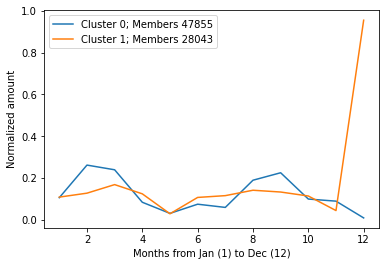

In [262]:
fig, ax = plt.subplots()  #initializing plot
for i, cl in enumerate(mod.cluster_centers_): #iterating though cluster centers -->  typical donor in this cluster
    plt.plot([i for i in range(1,13)], cl, label='Cluster ' + str(i) + '; Members ' + str(members_in_cluster.loc[i][1])) #ploting each cluster
plt.legend() #inserting legend
fig.savefig(str(n_clusters) +'cluster centers month plot.png') #save plot for report
plt.xlabel('Months from Jan (1) to Dec (12)')
plt.ylabel('Normalized amount')
plt.show() #display plot
#I mai kjøper folk ferie. I november kjøper folk julegave. Stakkars fattige barn. 

In [263]:
df_merged = df_transformed.merge(df_original, how='inner', left_index=True, right_on='Giver ID')[['ClusterID', 'Source Channel Recruitment', 'Amount']] #merging Df_transformed and df_original by Giver ID. Wish to extract the channel of recruitment and analyse it by the typical giver groups :) 

In [264]:
df_merged.head()

,ClusterID,Source Channel Recruitment,Amount
0,0,Direct Mail,"90,00"
1433,0,Direct Mail,"35,00"
1734,0,Direct Mail,"35,00"
2002,0,Direct Mail,"35,00"
8848,0,Direct Mail,"100,00"


In [265]:
members_df = df_merged.groupby(by='ClusterID').count() #Grouping again by cluster ID
members_df.head(1)

,Source Channel Recruitment,Amount
ClusterID,,
0,106938,106949


In [266]:
members_df.columns = ['Number', '_'] #change to more logical name of columns 
members_df.head(1)

,Number,_
ClusterID,,
0,106938,106949


In [267]:
members_df = members_df['Number'] #take away column '-'
members_df.head()

ClusterID
0    106938
1    106084
Name: Number, dtype: int64

In [268]:
#  scale the channel of recruitment for each user group 
df_channel = df_merged.groupby(by=['ClusterID', 'Source Channel Recruitment']).count() #find the number of givers for each source 
for i in range(len(members_in_cluster)): #go through all the members
    df_channel.loc[i] = [t/members_df.loc[i] for t in df_channel.loc[i].values] #scale the number of givers "convinced to give" by a channel 

In [269]:
print(df_channel.index.get_level_values(1)) #get an overview of the different channels in each cluster
d = {t: i for i, t in enumerate(df_channel.index.get_level_values(1).unique())} #maping each channel to a number

Index(['Crowdfunding Event', 'Digital', 'Direct Mail', 'E Mail', 'Event',
       'Inspired Gift', 'Payment Channel Vipps -Unknown Donors', 'SMS',
       'Spontaneous Gift', 'Testamentarisk gave', 'Unknown',
       'Web Shop Inspired Gift', 'Digital', 'Direct Mail', 'E Mail', 'Event',
       'Inspired Gift', 'SMS', 'Spontaneous Gift', 'Testamentarisk gave',
       'Unknown', 'Web Shop Inspired Gift'],
      dtype='object', name='Source Channel Recruitment')


In [270]:
list(d.keys())[1]

'Digital'

### Finn ut hva categories burde vært/er for noe! 

In [271]:
categories = df_channel.index.get_level_values(1).unique().T
categories

Index(['Crowdfunding Event', 'Digital', 'Direct Mail', 'E Mail', 'Event',
       'Inspired Gift', 'Payment Channel Vipps -Unknown Donors', 'SMS',
       'Spontaneous Gift', 'Testamentarisk gave', 'Unknown',
       'Web Shop Inspired Gift'],
      dtype='object', name='Source Channel Recruitment')

In [272]:
df_channel['Amount'].loc[0][categories].index #checking the differnet categories 

Index(['Crowdfunding Event', 'Digital', 'Direct Mail', 'E Mail', 'Event',
       'Inspired Gift', 'Payment Channel Vipps -Unknown Donors', 'SMS',
       'Spontaneous Gift', 'Testamentarisk gave', 'Unknown',
       'Web Shop Inspired Gift'],
      dtype='object', name='Source Channel Recruitment')

## Bar plott of which channel the typical givers are convinced by

In [273]:
d

{'Crowdfunding Event': 0,
 'Digital': 1,
 'Direct Mail': 2,
 'E Mail': 3,
 'Event': 4,
 'Inspired Gift': 5,
 'Payment Channel Vipps -Unknown Donors': 6,
 'SMS': 7,
 'Spontaneous Gift': 8,
 'Testamentarisk gave': 9,
 'Unknown': 10,
 'Web Shop Inspired Gift': 11}

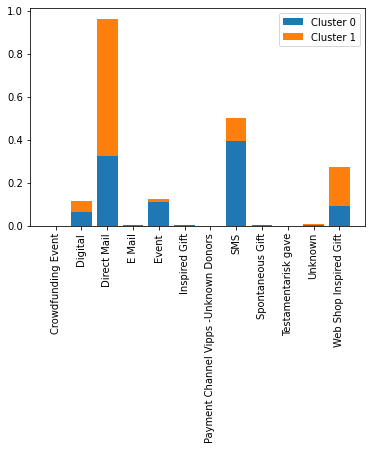

In [275]:
xticks = [i for i in range(len(d))] # labels for x-axis

old_bar = [0]*len(d)   # initializing zero vector with length == number of channels

fig, ax = plt.subplots() # initializing subplots

for i in range(n_clusters): #ploting channel for each cluster's 

    y = [0]*len(d)
    
    indices = df_channel['Amount'].loc[i].index
    values = df_channel['Amount'].loc[i].values
    
    for j, v in zip(indices, values):
        y[d[j]] = v #creating new y (height of bar per channel)
    ax.bar(xticks, y, bottom=old_bar, label='Cluster ' + str(i)) #plotting
    
    old_bar = np.add(old_bar, y) #adding values to the bars such (since the bars are put on top of each other)
plt.legend() # inserting legend
    
ax.set_xticks(xticks) #inserting x-labels
ax.set_xticklabels(d.keys(), rotation=90) #rotating labels 90 deg
fig.savefig(str(n_clusters) + 'Clusters bar plot.png') # save bar plot for report
plt.show() #display plot


## Checking the different typical groups

In [276]:
df_channel

Amount
ClusterID Source Channel Recruitment                     
0         Crowdfunding Event                     0.000047
          Digital                                0.064075
          Direct Mail                            0.323954
          E Mail                                 0.002861
          Event                                  0.109409
          Inspired Gift                          0.002805
          Payment Channel Vipps -Unknown Donors  0.000608
          SMS                                    0.395005
          Spontaneous Gift                       0.004395
          Testamentarisk gave                    0.000056
          Unknown                                0.004891
          Web Shop Inspired Gift                 0.091857
1         Digital                                0.050903
          Direct Mail                            0.639757
          E Mail                                 0.000368
          Event                                  0.016383
          Inspired Gift                          0.001112
          SMS                                    0.105860
          Spontaneous Gift                       0.001141
          Testamentarisk gave                    0.000123
          Unknown                                0.003064
          Web Shop Inspired Gift                 0.181290

In [277]:
CLUSTER = 0

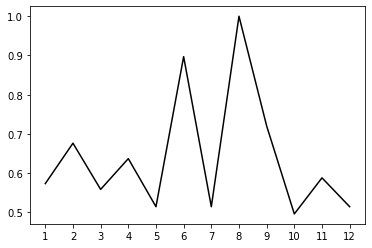

In [278]:
#checking that the typical groups are representative for each person (especially for cluster)
fig, ax = plt.subplots()
yo = df_transformed[df_transformed['ClusterID']==CLUSTER].drop('ClusterID', axis=1)
for i in range(len(yo)):
    #ax.plot(df_transformed.columns, df_transformed.loc[giverid0].values, color='red')
    ax.plot(yo.columns, yo.iloc[i].values, color='black')
    if i > -1: break
plt.show()